## Assignment 2

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from scipy.stats import beta

import matplotlib.pyplot as plt

### 1. Inference for binomial proportion (Computer)

We load the data and get number of lakes with algae (y) and number of lakes (n).

In [2]:
obs = np.loadtxt('../data/algae.txt')
n = obs.shape[0]
y = int(obs.sum())
print('n = {:d}'.format(n))
print('y = {:d}'.format(y))

n = 274
y = 44


The prior are given as $p(\pi) = \textrm{Beta}(a, b)$, where $a = 2$ and $b = 10$.

In [3]:
a, b = 2, 10
prior = beta(a, b)

#### a) What can you say about the value of the unknown $\pi$ according to the observations and your prior knowledge?

From the book (p. 35) we get the posterior distribution $p(\pi \; | \; y)$ given the observations and the prioer, e.g. $p(y\; | \; \pi)$:

$$
\begin{align}
p(\pi \; | \; y) &\propto \textrm{Beta}(a + y, b + n - y) \\
                 &= \textrm{Beta}(2 + 44, 10 + 274 - 44) \\
                 &= \textrm{Beta}(46, 240)
\end{align}
$$

In [4]:
posterior = beta(a + y, b + n - y)

The posterior mean is 16.1%

In [5]:
print('Posterior  mean : {:.4%}'.format(posterior.mean()))

Posterior  mean : 16.0839%


In [6]:
print('Posterior 95% central CI : {:.1%} - {:.1%}'.format(posterior.interval(.95)[0], posterior.interval(.95)[1]))

Posterior 95% central CI : 12.1% - 20.6%


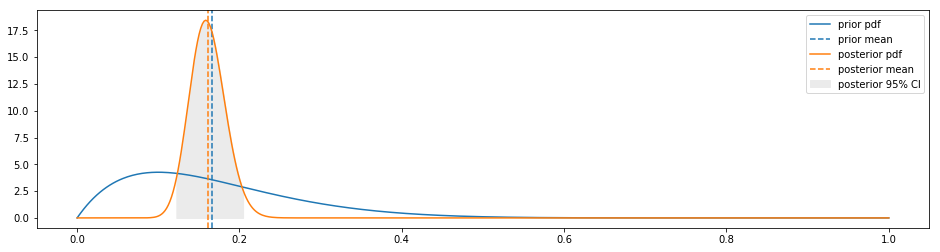

In [7]:
x = np.linspace(0.0, 1, 500)
pd = posterior.pdf(x)
fig, ax = plt.subplots(figsize = (16, 4))
ax.plot(x, prior.pdf(x), label = 'prior pdf', color = 'C0')
ax.axvline(prior.mean(), color='C0', label = 'prior mean', linestyle = '--')
ax.plot(x, pd, label = 'posterior pdf', color = 'C1')
ax.axvline(posterior.mean(), color='C1', label = 'posterior mean', linestyle = '--')
x_95_idx = (x > posterior.ppf(0.025)) & (x < posterior.ppf(0.975))
plt.fill_between(x[x_95_idx], pd[x_95_idx], color='0.92', label = 'posterior 95% CI')
ax.legend(loc = 'upper right')
None

#### b) What is the probability that the proportion of monitoring sites with detectable algae levels $\pi$ is smaller than $\pi_0 = 0.2$ that is known from historical records?

We use the posterior distribution and see that the probability $\pi$ < $\pi_0$ is 95.86%:

In [8]:
print('{:.2%}'.format(posterior.cdf(.2)))

95.86%


#### c) What assumptions are required in order to use this kind of a model with this type of data?

1. The observations are exchangeable.
2. The observations follows a binomial model.
3. The prior follows a $\textrm{Beta}(a, b)$-distribution, with $a = 2$ and $b = 10$.

#### d) Make prior sensitivity analysis by testing a couple of different reasonable priors. Summarize the results by one or two sentences.

We try an uninfrmative and strong prior to compare:
- Uniform prior, e.g. $\mathrm{beta}(1, 1)$
- A strong $\mathrm{beta}(1028, 3082)$, which corresponds to 15 previous measurements of the 274 lakes, where the mean algae percentages was 25%

Uniform prior             : Prior Mean       : 50.0000%
                          : Posterior Mean   : 16.3043%
                          : Posterior 95% CI : 12.2% - 20.9%
Beta(1028, 3082) prior    : Prior Mean       : 25.0122%
                          : Posterior Mean   : 24.4526%
                          : Posterior 95% CI : 23.2% - 25.7%


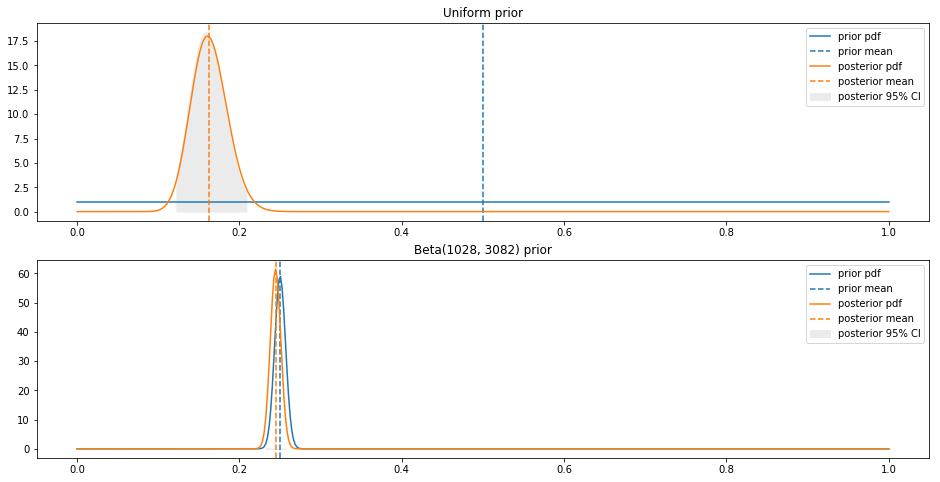

In [9]:
priors = [(1, 1, 'Uniform prior'), (1028, 3082, 'Beta(1028, 3082) prior')]

fig, ax = plt.subplots(nrows = len(priors), figsize = (16, 4 * len(priors)))
for i in range(len(priors)):    
    a, b, title = priors[i]
    prior = beta(a, b)
    posterior = beta(a + y, b + n - y)
    x = np.linspace(0.0, 1, 500)
    
    ax[i].plot(x, prior.pdf(x), label = 'prior pdf', color = 'C0')
    ax[i].axvline(prior.mean(), color='C0', label = 'prior mean', linestyle = '--')
    ax[i].plot(x, posterior.pdf(x), label = 'posterior pdf', color = 'C1')
    ax[i].axvline(posterior.mean(), color='C1', label = 'posterior mean', linestyle = '--')
    ax[i].set_title(title)
    x_95_idx = (x > posterior.ppf(0.025)) & (x < posterior.ppf(0.975))
    ax[i].fill_between(x[x_95_idx], pd[x_95_idx], color='0.92', label = 'posterior 95% CI')
    ax[i].legend(loc = 'upper right')
    
    print('{:<25s} : Prior Mean       : {:.4%}'.format(title, prior.mean()))
    print('{:<25s} : Posterior Mean   : {:.4%}'.format('', posterior.mean()))
    print('{:<25s} : Posterior 95% CI : {:.1%} - {:.1%}'.format('', posterior.interval(.95)[0], posterior.interval(.95)[1]))
None

We see with the uninformative uniform prior, that the new data is dominant in the posterior, which is very close to the previous $\mathrm{beta}(2, 10)$ prior. On the other hand the given the strong prior, with many previous meaurements of different expected value, the new data only shift the posterier a little bit, and since there are so meny measurements, the CI is much more narrow, compared to the $\mathrm{beta}(2, 10)$ and uniform prior.